In [2]:
import numpy as np
import pandas as pd
import random
import string 
import warnings
warnings.filterwarnings('ignore')

In [3]:
import re
import matplotlib.pyplot as plt
import matplotlib

In [4]:
df1=pd.read_csv('song_data.csv')
df1.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [5]:
len(df1)

1000000

In [6]:
df1.shape

(1000000, 5)

In [7]:
print('The number of rows is: %2.3d'%df1.shape[0])
print('The number of columns is: %2.1d'%df1.shape[1])

The number of rows is: 1000000
The number of columns is:  5


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [9]:
df1.dtypes

song_id        object
title          object
release        object
artist_name    object
year            int64
dtype: object

In [10]:
df1.describe(include='all')

,song_id,title,release,artist_name,year
count,1000000,999985,999995,1000000,1000000.000000
unique,999056,702428,149288,72665,NaN
top,SOUYQYY12AF72A000F,Intro,Greatest Hits,Michael Jackson,NaN
freq,3,1510,2014,194,NaN
mean,NaN,NaN,NaN,NaN,1030.325652
std,NaN,NaN,NaN,NaN,998.745002
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,1969.000000
75%,NaN,NaN,NaN,NaN,2002.000000


In [11]:
df1.isnull().sum()

song_id         0
title          15
release         5
artist_name     0
year            0
dtype: int64

In [12]:
df1.isnull().sum().sum()

20

In [13]:
df2=pd.read_table('song_data2.txt', sep='\t', names=['user_id', 'song_id', 'listen_count'])
df2.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [14]:
df2.shape

(2000000, 3)

In [15]:
print('The number of rows is: %2.3d'%df2.shape[0])
print('The number of columns is: %2.1d'%df2.shape[1])

The number of rows is: 2000000
The number of columns is:  3


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 3 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   user_id       object
 1   song_id       object
 2   listen_count  int64 
dtypes: int64(1), object(2)
memory usage: 45.8+ MB


In [17]:
df2.dtypes

user_id         object
song_id         object
listen_count     int64
dtype: object

In [18]:
df2.describe(include='all')

,user_id,song_id,listen_count
count,2000000,2000000,2.000000e+06
unique,76353,10000,NaN
top,6d625c6557df84b60d90426c0116138b617b9449,SOFRQTD12A81C233C0,NaN
freq,711,8277,NaN
mean,NaN,NaN,3.045485e+00
std,NaN,NaN,6.579720e+00
min,NaN,NaN,1.000000e+00
25%,NaN,NaN,1.000000e+00
50%,NaN,NaN,1.000000e+00
75%,NaN,NaN,3.000000e+00


In [19]:
df2.isnull().sum()

user_id         0
song_id         0
listen_count    0
dtype: int64

In [20]:
df2.isnull().sum().sum()

0

In [22]:
# combining both dataframes df1 and df2
df = pd.merge(df1,df2.drop_duplicates(['song_id']), on='song_id', how='left')
df.head()

,song_id,title,release,artist_name,year,user_id,listen_count
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003,NaN,NaN
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995,NaN,NaN
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006,NaN,NaN
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003,NaN,NaN
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0,NaN,NaN


In [23]:
df.columns

Index(['song_id', 'title', 'release', 'artist_name', 'year', 'user_id',
       'listen_count'],
      dtype='object')

In [24]:
df.shape

(1000000, 7)

In [25]:
print('The number of rows is: %2.3d'%df.shape[0])
print('The number of columns is: %2.1d'%df.shape[1])

The number of rows is: 1000000
The number of columns is:  7


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   song_id       1000000 non-null  object 
 1   title         999985 non-null   object 
 2   release       999995 non-null   object 
 3   artist_name   1000000 non-null  object 
 4   year          1000000 non-null  int64  
 5   user_id       10269 non-null    object 
 6   listen_count  10269 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 61.0+ MB


In [27]:
df.dtypes

song_id          object
title            object
release          object
artist_name      object
year              int64
user_id          object
listen_count    float64
dtype: object

In [28]:
df.describe(include='all')

,song_id,title,release,artist_name,year,user_id,listen_count
count,1000000,999985,999995,1000000,1000000.000000,10269,10269.000000
unique,999056,702428,149288,72665,NaN,1825,NaN
top,SOUYQYY12AF72A000F,Intro,Greatest Hits,Michael Jackson,NaN,5a905f000fc1ff3df7ca807d57edb608863db05d,NaN
freq,3,1510,2014,194,NaN,371,NaN
mean,NaN,NaN,NaN,NaN,1030.325652,NaN,2.881683
std,NaN,NaN,NaN,NaN,998.745002,NaN,6.116669
min,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000
25%,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000
50%,NaN,NaN,NaN,NaN,1969.000000,NaN,1.000000
75%,NaN,NaN,NaN,NaN,2002.000000,NaN,3.000000


In [29]:
df.isnull().sum()

song_id              0
title               15
release              5
artist_name          0
year                 0
user_id         989731
listen_count    989731
dtype: int64

In [30]:
df.isnull().sum().sum()

1979482

In [31]:
# using dropna() function  
df.dropna(axis=0, how='any', inplace=True)

In [32]:
print('The number of rows is: %2.3d'%df.shape[0])
print('The number of columns is: %2.1d'%df.shape[1])

The number of rows is: 10269
The number of columns is:  7


In [33]:
# Are there any duplicates ?
dups=df.duplicated()
print("No. of duplicated rows = %d" %(dups.sum()))
df[dups]

No. of duplicated rows = 138


,song_id,title,release,artist_name,year,user_id,listen_count
83415,SONLOQQ12A8C139AF9,Go To Sleep,Hail To The Thief,Radiohead,2003,b61afb42335287239bd40e1dea50d849cbf8a9a9,1.0
165669,SOESVAM12A8C138BF2,Words So Leisured,Take Me Out,Franz Ferdinand,2004,02192554db8fe6d17b6309aabb2b7526a2e58534,1.0
225490,SOONSSB12AF72A7C44,Taper Jean Girl,Aha Shake Heartbreak,Kings Of Leon,2004,22d652f8891ba2186a4ce3ee8de7c192148108ef,1.0
231406,SORLJFU12A6D4FB880,Space Dementia,Origin Of Symmetry,Muse,0,1b704d4cddabea8258bd93497fcb73eab32fa592,1.0
272122,SOXKRVO12A8C140C3B,Last Kiss,E=MC²,Mariah Carey,2008,cc62e608a1a21353e1673817973235cde4116bad,2.0
...,...,...,...,...,...,...,...
977163,SOXHYWX12A8C142CE8,Real World,When The World Comes Down,The All-American Rejects,2008,73e9e981d5fc2a6453cdfb5025e2fa0a144a4142,1.0
977955,SOKDUUY12B0B80BD37,Rocket Queen,Live Era '87-'93,Guns N' Roses,1987,18dc95f354220b343e98ebbb7c8564291284ed9f,2.0
991107,SOIBSWV12A6D4F6AB3,Through The Wire,Through The Wire,Kanye West,2003,bd64f193f0f53f09d44ff48fd52830ff2fded392,1.0
997476,SOCGXXL12B0B808865,Yesterdays,Greatest Hits,Guns N' Roses,1991,18dc95f354220b343e98ebbb7c8564291284ed9f,1.0


In [34]:
df = df.drop_duplicates()
df.shape

(10131, 7)

In [35]:
print('The number of rows is: %2.3d'%df.shape[0])
print('The number of columns is: %2.1d'%df.shape[1])

The number of rows is: 10131
The number of columns is:  7


In [36]:
df['song'] = df['title']+' - '+df['artist_name']
df.head()

,song_id,title,release,artist_name,year,user_id,listen_count,song
245,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,d6589314c0a9bcbca4fee0c93b14bc402363afea,6.0,Anyone Else But You - Michael Cera & Ellen Page
412,SOGKGLB12A81C22AFA,Drunk and Hot Girls,Graduation,Kanye West / Mos Def,2007,529b42cdbc379ad2e765aec6d3bad8a192038741,2.0,Drunk and Hot Girls - Kanye West / Mos Def
464,SOWZDNH12A6D4F7237,Until The Day I Die (Album Version),Page Avenue,Story Of The Year,2003,be7bc6cf250e96f756bb042176774b8b3f9226a4,1.0,Until The Day I Die (Album Version) - Story Of...
484,SOQBGZD12AB0184341,Rewind (Demo),Riot!,Paramore,0,1b704d4cddabea8258bd93497fcb73eab32fa592,2.0,Rewind (Demo) - Paramore
548,SOTPWHK12A8AE46DC8,Never Knew Love,Love Songs,Rick Astley,1991,178e43d9c4e6cfccf3a371aed3532bc0ef030f11,1.0,Never Knew Love - Rick Astley


In [37]:
df=df[df['year']!=0]

In [38]:
df.listen_count.value_counts()

1.0      4869
2.0      1273
3.0       619
5.0       396
4.0       340
6.0       187
7.0       116
8.0        78
10.0       66
9.0        61
11.0       48
12.0       33
14.0       29
16.0       23
15.0       23
13.0       22
17.0       16
20.0       13
18.0       12
26.0       10
25.0        9
19.0        9
22.0        9
24.0        9
21.0        6
27.0        6
28.0        6
30.0        5
32.0        4
35.0        3
31.0        3
23.0        3
62.0        2
42.0        2
39.0        2
38.0        2
52.0        2
36.0        2
41.0        2
29.0        2
55.0        2
33.0        2
60.0        2
44.0        1
45.0        1
49.0        1
107.0       1
47.0        1
37.0        1
126.0       1
140.0       1
69.0        1
54.0        1
61.0        1
74.0        1
56.0        1
247.0       1
Name: listen_count, dtype: int64

In [39]:
df.listen_count.nunique()

57

In [40]:
df.year.unique()

array([2007, 2003, 1991, 2009, 2008, 2005, 2006, 2001, 1992, 1970, 1989,
       2002, 1996, 2010, 1999, 2000, 1995, 1976, 1977, 2004, 1983, 1998,
       1968, 1997, 1975, 1980, 1994, 1988, 1993, 1974, 1984, 1987, 1978,
       1981, 1985, 1958, 1969, 1966, 1972, 1979, 1967, 1971, 1959, 1982,
       1990, 1964, 1973, 1986, 1961, 1965, 1956, 1955, 1963, 1954, 1962,
       1960, 1957], dtype=int64)

In [41]:
df.year.nunique()

57

In [42]:
df = df.reset_index()

## Univariate Analysis:

<AxesSubplot:>

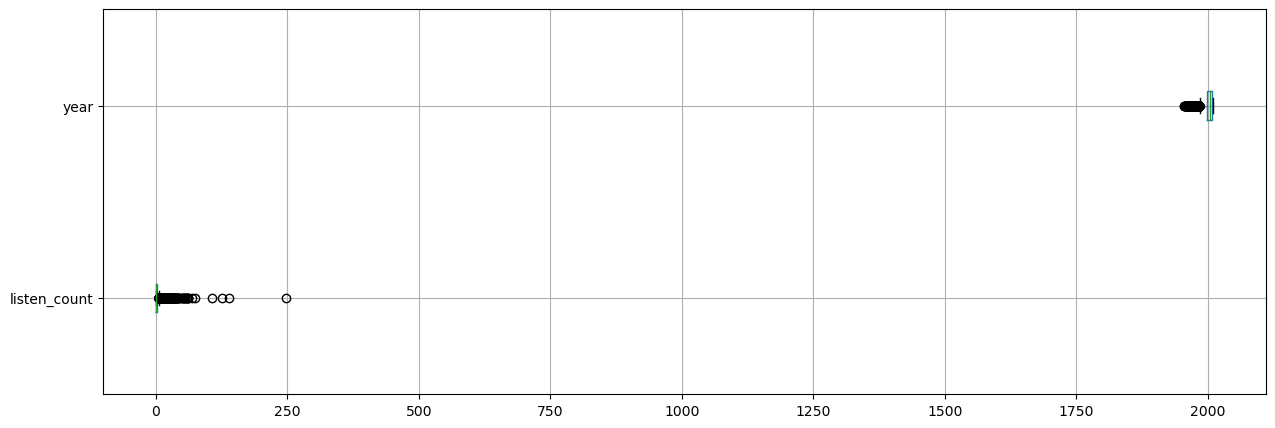

In [43]:
##Checking for Outliers for all continuous variables:
plt.figure(figsize=(15,5))
df[['listen_count', 'year']].boxplot(vert=0)

There are outliers in the variable listen_count.

<AxesSubplot:xlabel='listen_count'>

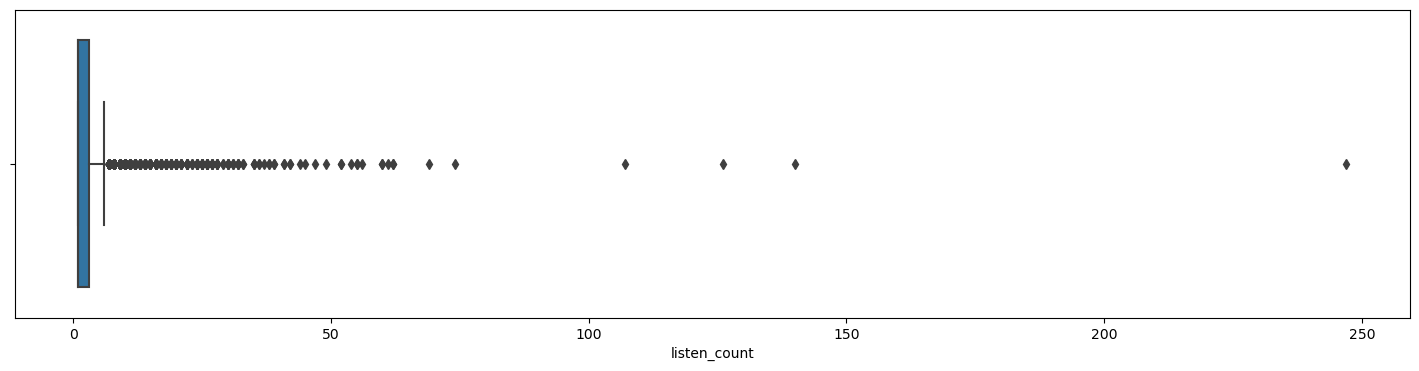

In [44]:
import seaborn as sns
plt.figure(figsize=(18,4))
sns.boxplot(df['listen_count'])

Text(0.5, 1.0, 'Variation in year')

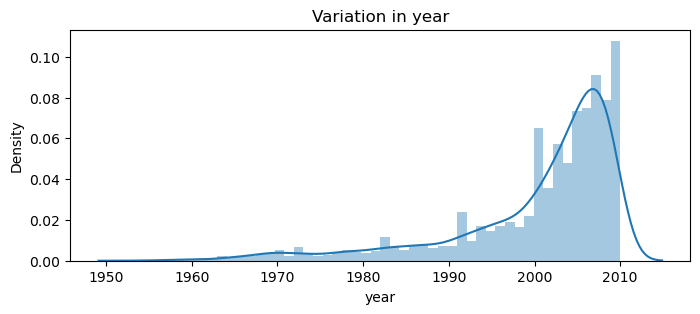

In [45]:
plt.figure(figsize=(8,3))
sns.distplot(df['year'],hist=True)
plt.title('Variation in year')

Therefore, there are two peaks in the yearly density plot.

Text(0.5, 1.0, 'Variation in year')

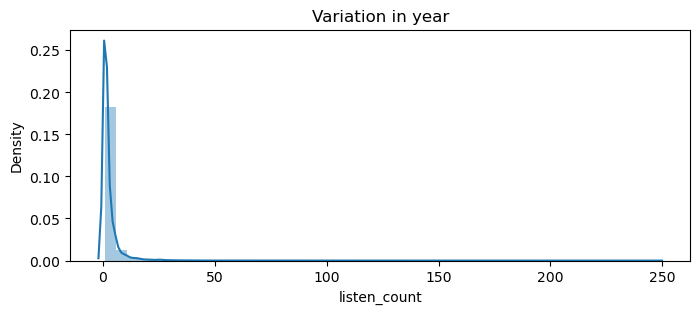

In [46]:
plt.figure(figsize=(8,3))
sns.distplot(df['listen_count'],hist=True)
plt.title('Variation in year')

In [47]:
df.columns

Index(['index', 'song_id', 'title', 'release', 'artist_name', 'year',
       'user_id', 'listen_count', 'song'],
      dtype='object')

## Bi-variate analysis:

Text(0.5, 1.0, 'Variation in Year with respect to Listen count of the Song')

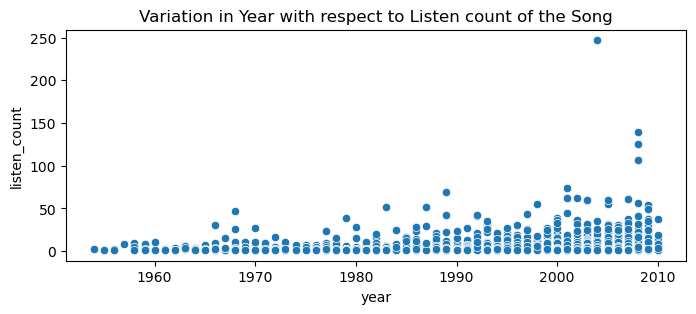

In [48]:
plt.figure(figsize=(8,3))
sns.scatterplot(df['year'],df['listen_count'])
plt.title('Variation in Year with respect to Listen count of the Song')

In [49]:
df_grouped = df.groupby(['song']).agg({'listen_count':'count'}).reset_index()
df_grouped.head()

,song,listen_count
0,#!*@ You Tonight [Featuring R. Kelly] (Explici...,1
1,#40 - DAVE MATTHEWS BAND,1
2,& Down - Boys Noize,1
3,'97 Bonnie & Clyde - Eminem,1
4,'Round Midnight - Amy Winehouse,1


In [50]:
df_grouped.shape

(8207, 2)

In [51]:
df_grouped_sum = df_grouped['listen_count'].sum()
df_grouped['percentage'] = (df_grouped['listen_count'] / df_grouped_sum ) * 100
df_grouped.sort_values(['listen_count', 'song'], ascending=[0,1])

,song,listen_count,percentage
2324,Forever & Always - Taylor Swift,4,0.047950
3031,Human - The Killers,4,0.047950
4097,Love All The Pain Away - Ronski Speed,4,0.047950
329,Always - Blink-182,3,0.035963
1772,Don't Stop The Music - Rihanna,3,0.035963
...,...,...,...
8202,teachme (Album Version) - Musiq Soulchild,1,0.011988
8203,the Love Song - K-OS,1,0.011988
8204,you were there with me - Four Tet,1,0.011988
8205,¡Viva La Gloria! (Album Version) - Green Day,1,0.011988


In [104]:
#df = df.reset_index()

In [52]:
df['table_index'] = df.index

In [53]:
df.head()

,index,song_id,title,release,artist_name,year,user_id,listen_count,song,table_index
0,245,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,d6589314c0a9bcbca4fee0c93b14bc402363afea,6.0,Anyone Else But You - Michael Cera & Ellen Page,0
1,412,SOGKGLB12A81C22AFA,Drunk and Hot Girls,Graduation,Kanye West / Mos Def,2007,529b42cdbc379ad2e765aec6d3bad8a192038741,2.0,Drunk and Hot Girls - Kanye West / Mos Def,1
2,464,SOWZDNH12A6D4F7237,Until The Day I Die (Album Version),Page Avenue,Story Of The Year,2003,be7bc6cf250e96f756bb042176774b8b3f9226a4,1.0,Until The Day I Die (Album Version) - Story Of...,2
3,548,SOTPWHK12A8AE46DC8,Never Knew Love,Love Songs,Rick Astley,1991,178e43d9c4e6cfccf3a371aed3532bc0ef030f11,1.0,Never Knew Love - Rick Astley,3
4,634,SOBQZKH12A8AE48A02,Heroes Get Remembered_ Legends Never Die,Rise Or Die Trying,Four Year Strong,2007,76235885b32c4e8c82760c340dc54f9b608d7d7e,1.0,Heroes Get Remembered_ Legends Never Die - Fou...,4


In [54]:
df['listen_count'] = np.random.randint(1,3, size=len(df))

In [55]:
df.head()

,index,song_id,title,release,artist_name,year,user_id,listen_count,song,table_index
0,245,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,d6589314c0a9bcbca4fee0c93b14bc402363afea,1,Anyone Else But You - Michael Cera & Ellen Page,0
1,412,SOGKGLB12A81C22AFA,Drunk and Hot Girls,Graduation,Kanye West / Mos Def,2007,529b42cdbc379ad2e765aec6d3bad8a192038741,1,Drunk and Hot Girls - Kanye West / Mos Def,1
2,464,SOWZDNH12A6D4F7237,Until The Day I Die (Album Version),Page Avenue,Story Of The Year,2003,be7bc6cf250e96f756bb042176774b8b3f9226a4,1,Until The Day I Die (Album Version) - Story Of...,2
3,548,SOTPWHK12A8AE46DC8,Never Knew Love,Love Songs,Rick Astley,1991,178e43d9c4e6cfccf3a371aed3532bc0ef030f11,2,Never Knew Love - Rick Astley,3
4,634,SOBQZKH12A8AE48A02,Heroes Get Remembered_ Legends Never Die,Rise Or Die Trying,Four Year Strong,2007,76235885b32c4e8c82760c340dc54f9b608d7d7e,1,Heroes Get Remembered_ Legends Never Die - Fou...,4


In [56]:
len(df)

8342

In [57]:
df_1 = df[['table_index','listen_count']]

In [58]:
df_1.head(5)

,table_index,listen_count
0,0,1
1,1,1
2,2,1
3,3,2
4,4,1


In [59]:
df_2 = df_1.iloc[0:8000]

In [60]:
X = df_2['table_index'].array.reshape(-1,1)
y = df_2['listen_count'].array.reshape(-1,1)

In [61]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=SEED)

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [64]:
y_pred = classifier.predict(X_test)

In [65]:
acc =  classifier.score(X_test, y_test)
print(acc)

0.52875


              precision    recall  f1-score   support

           1       0.53      0.53      0.53       402
           2       0.53      0.52      0.52       398

    accuracy                           0.53       800
   macro avg       0.53      0.53      0.53       800
weighted avg       0.53      0.53      0.53       800



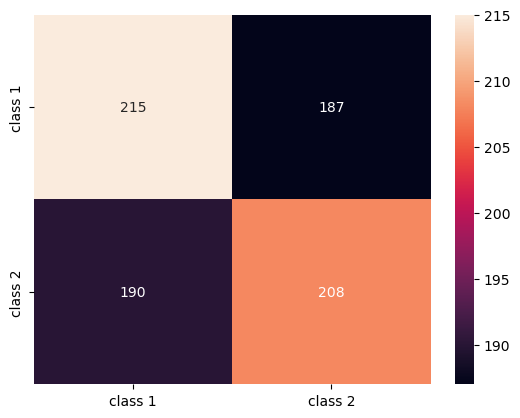

In [66]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

classes_names = ['class 1','class 2']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

In [68]:
#euclidean method
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='euclidean',algorithm='brute')
knn.fit(df_2.values)

NearestNeighbors(algorithm='brute', metric='euclidean')

In [69]:
distances,indices = knn.kneighbors(df_1,n_neighbors=3)

In [70]:
indices

array([[   0,    1,    2],
       [   1,    0,    2],
       [   2,    1,    3],
       ...,
       [7999, 7998, 7997],
       [7999, 7998, 7997],
       [7999, 7998, 7997]], dtype=int64)

In [71]:
distances

array([[  0.        ,   1.        ,   2.        ],
       [  0.        ,   1.        ,   1.        ],
       [  0.        ,   1.        ,   1.41421356],
       ...,
       [340.00147059, 341.        , 342.        ],
       [341.        , 342.00146199, 343.00145772],
       [342.00146199, 343.        , 344.        ]])

In [72]:
index_for_song = df_2.index.tolist().index(56)

In [73]:
index_for_song

56

In [74]:
sim_songs = indices[index_for_song].tolist()

In [75]:
song_distances = distances[index_for_song].tolist()

In [76]:
song_distances

[0.0, 1.4142135623730951, 1.4142135623730951]

In [77]:
id_song = sim_songs.index(index_for_song)

In [78]:
id_song

0

In [79]:
song_distances.pop(id_song)

0.0

In [80]:
print('The Nearest songs to song:', sim_songs)
print('The Distance from song:', song_distances)

The Nearest songs to song: [56, 55, 57]
The Distance from song: [1.4142135623730951, 1.4142135623730951]


In [81]:
df.loc[56]

index                                               6548
song_id                               SOGLBQA12A6701E7AF
title                                      Too Much Love
release                                  LCD Soundsystem
artist_name                              LCD Soundsystem
year                                                2005
user_id         5a905f000fc1ff3df7ca807d57edb608863db05d
listen_count                                           1
song                     Too Much Love - LCD Soundsystem
table_index                                           56
Name: 56, dtype: object

In [84]:
df.loc[57]

index                                               6714
song_id                               SOWEWCO12A8C14074E
title                         Everything Will Be Alright
release                                         Hot Fuss
artist_name                                  The Killers
year                                                2004
user_id         94d5bdc37683950e90c56c9b32721edb5d347600
listen_count                                           2
song            Everything Will Be Alright - The Killers
table_index                                           57
Name: 57, dtype: object

Using Cosine similiarty for collaborative filtering

In [85]:
knn = NearestNeighbors(metric='euclidean',algorithm='brute')
knn.fit(df_2.values)

NearestNeighbors(algorithm='brute', metric='euclidean')

In [86]:
distances,indices = knn.kneighbors(df_1,n_neighbors=3)

In [184]:
X = df_2['table_index'].array.reshape(-1,1)
y = df_2['listen_count'].array.reshape(-1,1)

In [186]:
indices

array([[   0,    1,    2],
       [   1,    0,    2],
       [   2,    1,    3],
       ...,
       [7999, 7998, 7997],
       [7999, 7998, 7997],
       [7999, 7998, 7997]], dtype=int64)

In [188]:
distances

array([[  0.        ,   1.        ,   2.        ],
       [  0.        ,   1.        ,   1.        ],
       [  0.        ,   1.        ,   1.41421356],
       ...,
       [340.00147059, 341.        , 342.00146199],
       [341.        , 342.00146199, 343.        ],
       [342.00146199, 343.        , 344.00145349]])

In [191]:
index_for_song1 = df_2.index.tolist().index(56)

In [193]:
index_for_song

56

In [196]:
sim_songs1 = indices[index_for_song].tolist()

In [198]:
sim_songs1

[56, 55, 57]

In [200]:
song_distances1 = distances[index_for_song].tolist()

In [202]:
song_distances1

[0.0, 1.4142135623730951, 1.4142135623730951]

In [235]:
id_song1 = sim_songs1.index(index_for_song)

In [206]:
id_song1

0

In [243]:
song_distances1.pop(id_song1)

1.4142135623730951

In [210]:
print('The Nearest songs to song:', sim_songs1)
print('The Distance from song:', song_distances1)

The Nearest songs to song: [56, 55, 57]
The Distance from song: [1.4142135623730951]


In [213]:
df.loc[56]

level_0                                               56
index                                               6548
song_id                               SOGLBQA12A6701E7AF
title                                      Too Much Love
release                                  LCD Soundsystem
artist_name                              LCD Soundsystem
year                                                2005
user_id         5a905f000fc1ff3df7ca807d57edb608863db05d
listen_count                                           1
song                     Too Much Love - LCD Soundsystem
table_index                                           56
Name: 56, dtype: object

In [217]:
df.loc[55]

level_0                                               55
index                                               6535
song_id                               SOWKLEE12A81C232AC
title                                              Rage!
release                                 She's in Control
artist_name                                      Chromeo
year                                                2004
user_id         5a905f000fc1ff3df7ca807d57edb608863db05d
listen_count                                           2
song                                     Rage! - Chromeo
table_index                                           55
Name: 55, dtype: object

Using manhattan distancing with brute algorithm for collaborative filtering

In [218]:
knn = NearestNeighbors(metric='manhattan',algorithm='brute')
knn.fit(df_2.values)

NearestNeighbors(algorithm='brute', metric='manhattan')

In [220]:
distances,indices = knn.kneighbors(df_1,n_neighbors=3)

In [222]:
X = df_2['table_index'].array.reshape(-1,1)
y = df_2['listen_count'].array.reshape(-1,1)

In [224]:
indices

array([[   0,    1,    2],
       [   1,    0,    2],
       [   2,    1,    0],
       ...,
       [7998, 7999, 7996],
       [7999, 7997, 7998],
       [7998, 7999, 7996]], dtype=int64)

In [226]:
distances

array([[  0.,   1.,   2.],
       [  0.,   1.,   1.],
       [  0.,   1.,   2.],
       ...,
       [341., 341., 343.],
       [341., 343., 343.],
       [343., 343., 345.]])

In [228]:
index_for_song2 = df_2.index.tolist().index(56)

In [230]:
index_for_song2

56

In [232]:
sim_songs2 = indices[index_for_song].tolist()

In [250]:
sim_songs2

[56, 54, 55]

In [252]:
song_distances2 = distances[index_for_song2].tolist()

In [253]:
song_distances2

[0.0, 2.0, 2.0]

In [246]:
id_song2 = sim_songs2.index(index_for_song2)

In [247]:
id_song2

0

In [256]:
song_distances2.pop(id_song2)

0.0

In [258]:
print('The Nearest songs to song:', sim_songs2)
print('The Distance from song:', song_distances2)

The Nearest songs to song: [56, 54, 55]
The Distance from song: [2.0, 2.0]


In [260]:
df.loc[56]

level_0                                               56
index                                               6548
song_id                               SOGLBQA12A6701E7AF
title                                      Too Much Love
release                                  LCD Soundsystem
artist_name                              LCD Soundsystem
year                                                2005
user_id         5a905f000fc1ff3df7ca807d57edb608863db05d
listen_count                                           1
song                     Too Much Love - LCD Soundsystem
table_index                                           56
Name: 56, dtype: object

In [261]:
df.loc[55]

level_0                                               55
index                                               6535
song_id                               SOWKLEE12A81C232AC
title                                              Rage!
release                                 She's in Control
artist_name                                      Chromeo
year                                                2004
user_id         5a905f000fc1ff3df7ca807d57edb608863db05d
listen_count                                           2
song                                     Rage! - Chromeo
table_index                                           55
Name: 55, dtype: object